In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Bajamos los datos

In [6]:
# !wget -O datos.zip https://www.dropbox.com/scl/fi/v6qfj1ktarocr8sl02r8k/datos.zip?rlkey=2u060s5619gvcvnnnhq93rn4e&st=jy3dah88&dl=1
# !unzip datos.zip

In [7]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

# Cargamos los archivos

In [12]:
X_train = np.loadtxt("datos/X_train.csv", delimiter=",") #Funcón de numpy que carga texto (En nuestro caso las imagenes)
y_train = np.loadtxt("datos/y_train.csv", delimiter=",").astype(int) # Indice entero de que clase es cada imagen, hay 5000
X_test = np.loadtxt("datos/X_test.csv", delimiter=",") # Variables test son las de prueba, NO USAR
y_test = np.loadtxt("datos/y_test.csv", delimiter=",").astype(int) # Indice de las imagenes de PRUEBA

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5000, 784), (5000,), (500, 784), (500,))

# Revisamos la cantida de muestras por cada clase

In [9]:
np.bincount(y_train), np.bincount(y_test) # Cuenta cuántos ceros hay, cuántos unos hay, etc.. Hay 500 de cada uno en los datos de entrenamiento y 50 de cada uno en los datos de prueba

(array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]),
 array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50]))

# Visualizamos

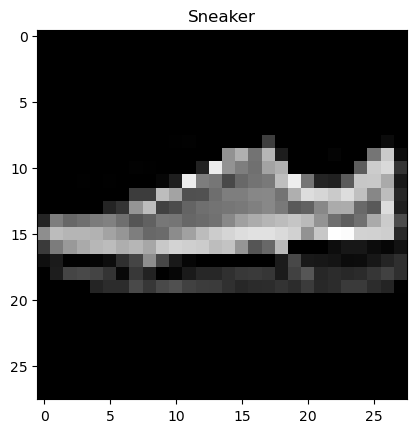

In [10]:
ix = 7 #Agarro el elemento numero 7
plt.imshow(X_test[ix].reshape(28,28), cmap="gray") #Reshape para acomodarlo en 28 * 28 (cuadrado)
plt.title(class_names[y_test[ix]]); #Le pone el nombre ... chequea que está bien (coincide el titulo con la imagen)

# Separamos en datos de desarrollo

Garantizamos que las clases siguen igualmente balanceadas (estratificación)

In [11]:
from sklearn.model_selection import train_test_split
X_newtrain, X_dev, y_newtrain, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train) # Test size = 20%, divide un quinto para reservar como desarrollo.
#Stratify garantiza que todo lo que metió en ese 20% tiene la misma cantidad de prendas de ropa que en el resto

np.bincount(y_newtrain), np.bincount(y_dev) #New Train = E , y_dev = Desarrollo

ModuleNotFoundError: No module named 'sklearn'

# KNN

## Consigna:

* Implementar KNN con distancia coseno

$$d(A,B) = 1-\frac{A\cdot B}{\|A\|\|B\|}$$

* Computar la distancia entre los datos de entrenamiento y los desarrollo
* Ordenar estas distancias de menor a mayor
* Para cada dato de desarrollo elegir las primeras $k$ muestras y listar de que clase son
* Calcular la moda
* Medir la performance del sistema como:

$$ \text{exactitud} = \frac{\text{cantidad de muestra bien reconocidas}}{\text{cantidad de muestras totales}}$$

Recomendación, primero desarrollar en forma lenta utilizando loops *for*, y una vez resulto el problema, pasar a optimizarlo utilizando las operaciones vectorizadas a lo *numpy* para evitar los loops.

In [67]:
def distance(A, B):
    dot_product = A.dot(B)
    norm_product = np.linalg.norm(A) * np.linalg.norm(B)
    return 1 - (dot_product / norm_product)


#image set = lista de tuplas, con cada tupla = (imagen(vector), typo de imagen)
def image_distances(image_set, image):
    distances = []
    dis = 0
    for pic, label in image_set:
        dis = distance(image, pic)
        distances.append((dis, label))
    return distances

#distances = lista de tuplas, con cada tupla = (distanca de cada imagen de entrenamiento con la imagen elegida, typo de imagen)
def classify_image(distances, k):
    distances.sort(key=lambda x: x[0])
    number_of_apperances = np.zeros(10)
    for i in range(0, k): # k = cantidad de vecinos que queremos analizar 
       image_type = distances[i][1]
       number_of_apperances[image_type] = number_of_apperances[image_type] + 1  

    max = -1
    max_index = -1
    for i in range(0, len(number_of_apperances)):
        if(number_of_apperances[i] > max):
            max = number_of_apperances[i]
            max_index = i
    
    return max_index

def first_test(image, image_type):
    images = X_train[:4000]
    types = y_train[:4000]
    image_set = zip(images, types) #creamos las tuplas
    distances = image_distances(image_set, image)
    expected_type = classify_image(distances, 5)
    return expected_type
    # print(f"succes: {image_type == expected_type}; original type: {image_type}; expected type: {expected_type}")

expected_types = []
for i in range(4000, 5000):
    image = X_train[i]
    image_type = y_train[i]
    expected_types.append((first_test(image, image_type), image_type))

print(expected_types)

[(0, 0), (1, 1), (4, 2), (3, 3), (4, 4), (7, 5), (0, 6), (7, 7), (8, 8), (9, 9), (6, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (0, 6), (9, 7), (8, 8), (9, 9), (0, 0), (1, 1), (1, 2), (1, 3), (4, 4), (5, 5), (3, 6), (9, 7), (8, 8), (9, 9), (0, 0), (1, 1), (4, 2), (3, 3), (4, 4), (9, 5), (6, 6), (7, 7), (8, 8), (9, 9), (0, 0), (1, 1), (6, 2), (3, 3), (0, 4), (7, 5), (0, 6), (7, 7), (8, 8), (9, 9), (2, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (0, 6), (7, 7), (8, 8), (9, 9), (0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (9, 5), (0, 6), (7, 7), (8, 8), (9, 9), (0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (7, 5), (2, 6), (9, 7), (8, 8), (9, 9), (6, 0), (1, 1), (2, 2), (3, 3), (4, 4), (9, 5), (4, 6), (7, 7), (8, 8), (9, 9), (0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (9, 5), (6, 6), (7, 7), (8, 8), (9, 9), (0, 0), (1, 1), (2, 2), (4, 3), (4, 4), (7, 5), (6, 6), (7, 7), (8, 8), (9, 9), (6, 0), (3, 1), (4, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (0, 0), (1, 1), (0, 2), (3, 3), (4, 4),

In [68]:
def distanceMatrix():# Apilar verticalmente los vectores en una matriz
    matrix_horizontal = X_train
    # Calcular las normas de cada vector
    norms = np.linalg.norm(matrix_horizontal, axis=1)
    #  Dividir cada componente de la matriz por la norma del vector correspondiente
    matrix_normalized_horizontal =matrix_horizontal / norms[:, np.newaxis]

    matrixz_normalized_vertical = np.transpose(matrix_normalized_horizontal)
    distances = matrix_normalized_horizontal @ matrixz_normalized_vertical
    ones = np.ones((len(distances), len(distances)))
    distances = ones - distances
    
    return distances




def nIIDEA(distances_matrix, start_index_desarrollo, end_index_desarrollo):
    sub_matrix = distances_matrix[start_index_desarrollo:end_index_desarrollo+1]
    # Eliminar las columnas desde col_start_index hasta col_end_index (inclusive col_end_index)
    sub_matrix = np.delete(sub_matrix, np.s_[start_index_desarrollo:end_index_desarrollo+1], axis=1)
    sub_matrix = np.argsort(sub_matrix, axis=1) % 10
    return sub_matrix

def knn(k):
    distance_matrix = distanceMatrix()
    start_index_development = 0
    end_index_development = 1000
    for i in range(0, 5):
        sub_matrix = nIIDEA(distance_matrix, 4000, 5000)
        k_sub_matrix = sub_matrix[:, :k]
        mode, frecuency = scipy.stats.mode(k_sub_matrix, axis=1)
    return mode

print(knn(5))


[0 1 4 3 4 7 0 7 8 9 6 1 2 3 4 5 0 9 8 9 0 1 1 1 4 5 3 9 8 9 0 1 4 3 4 9 6
 7 8 9 0 1 6 3 0 7 0 7 8 9 2 1 2 3 4 5 0 7 8 9 0 1 2 3 4 9 0 7 8 9 0 1 2 3
 4 7 2 9 8 9 6 1 2 3 4 9 4 7 8 9 0 1 2 3 4 9 6 7 8 9 0 1 2 4 4 7 6 7 8 9 6
 3 4 3 4 5 6 7 8 9 0 1 0 3 4 7 2 7 8 9 0 1 2 3 4 9 4 7 8 9 0 1 2 3 4 9 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 1 4 3 4 5 6 7 8 9 0 2 4 3 4 5 6 7 8 9 0 1 4 3 4
 7 2 7 8 9 0 1 2 3 4 9 6 7 8 9 0 1 2 3 4 5 6 7 8 9 2 1 4 3 4 7 4 7 8 9 0 1
 6 3 4 7 6 7 8 9 6 1 2 2 4 9 0 7 8 9 0 1 2 3 4 7 2 7 8 9 0 1 2 1 4 5 6 9 8
 9 0 1 2 3 4 7 6 7 8 9 0 1 2 3 4 9 4 7 8 9 0 1 6 3 4 5 6 7 8 9 0 1 2 3 4 7
 0 7 8 9 8 3 4 3 4 7 4 7 8 9 0 1 4 3 6 5 6 7 8 9 0 1 2 3 4 5 6 9 8 9 0 3 2
 3 4 9 6 7 8 9 0 1 2 0 4 5 6 7 8 9 0 1 2 3 4 9 4 7 8 9 0 1 4 3 4 9 2 7 8 9
 0 1 2 3 4 5 4 7 8 9 0 1 4 3 4 9 6 7 8 9 0 1 4 3 4 5 6 9 8 9 0 1 2 3 4 9 2
 7 8 9 0 1 2 3 4 7 0 7 8 9 0 1 2 3 2 7 6 7 8 9 0 1 2 3 6 7 6 7 8 9 0 1 2 3
 4 5 6 9 8 9 0 1 8 3 4 5 4 7 8 9 0 1 2 3 4 9 6 7 8 9 0 1 2 3 4 9 6 7 8 9 0
 1 2 3 4 5 6 7 8 9 0 1 2 

In [49]:
#test matriz distancias
def second_test():
    distancias_clasica = np.zeros((5000, 5000))
    for i in range(0, 5000):
        for j in range(0, 5000): 
            distancias_clasica[i][j] = distance(X_train[i], X_train[j])
    return distancias_clasica


def son_iguales(distancias_clasica):
    # distance_maitrx = distanceMatrix()
    matriz_de_comparacion = np.full((5000, 5000), False, dtype=bool)
    for i in range(0, 5000):
        for j in range(0, 5000):
            if np.isclose(distancias_clasica[i][j], distance_maitrx[i][j], atol=0.00001):
                matriz_de_comparacion[i][j] = True
    # print(distance_matrix)
    print(matriz_de_comparacion)

# second_test()
old_distances = second_test()
son_iguales(old_distances)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


# Validación Cruzada

## Consigna:

* Partir los datos en una partición de 5 partes manteniendo el mismo balance de clases en cada parte
* Iterar sobre estas partes, tomando 4 partes para entrenar y 1 para desarrollo de forma cíclia
* Medir la performance para cada parte
* Tomar el promedio

* Realizar la validación cruzada para distintos valores de $k$ de KNN, y encontrar el mejor

In [ ]:
def calculate_With_traingin_development(training, development, k):
    ammount_of_succeses = 0
    for image in development:
        distances = image_distances(training, image)
        expected_type = classify_image(distances, k)
        if (expected_type == image[1]):
            ammount_of_succeses = ammount_of_succeses + 1
    return ammount_of_succeses / 1000

for i in range(0, 5):
    full_image_set = list(zip(X_train, y_train))
    inicio_D = i * 1000
    fin_D = inicio_D + 1000
    
    # Creando la lista D
    D = full_image_set[inicio_D:fin_D]
    
    # Creando la lista T
    T = full_image_set[:inicio_D] + full_image_set[fin_D:]

    calculate_With_traingin_development(T, D, 5)
   

AttributeError: 'tuple' object has no attribute 'dot'